In [53]:
import matplotlib
from matplotlib import pyplot
from collections import Counter
%matplotlib inline
import json
import pandas as pd

In [62]:
reviews = []
with open("dataset/yelp_academic_dataset_review.json") as data_file:
    for line in data_file:
        reviews.append(json.loads(line))

reviews_df = pd.DataFrame(reviews) #dtype={'stars': float})
del reviews

In [63]:
businesses = []
with open("dataset/yelp_academic_dataset_business.json") as data_file:
    for line in data_file:
        businesses.append(json.loads(line))
        
businesses_df = pd.DataFrame(businesses)
del businesses

In [64]:
states = set(businesses_df['state'])
# One business in our dataset was mislabeled as being in Tamaulipas, Mexico.
states.remove("TAM")

In [65]:
karlsruhe_states = ["BW", "NW"]
edinburgh_states = ["EDH", "SCB", "ELN", "FIF", "HAM", "KHL", "MLN", "NTH", "SCB", "XGL"]
montreal_states = ["QC"]
waterloo_states = ["ON"]
us_states = [state for state in states if not ((state in karlsruhe_states) or 
                                               (state in edinburgh_states) or 
                                               (state in montreal_states) or 
                                               (state in waterloo_states))]

location_mapping = dict([(x,"Karlsruhe") for x in karlsruhe_states] + 
                        [(x,"Edinburgh") for x in edinburgh_states] + 
                        [(x,"Montreal") for x in montreal_states] + 
                        [(x,"Waterloo") for x in waterloo_states] + 
                        [(x,"USA") for x in us_states])

In [66]:
businesses_df['location'] = businesses_df['state'].map(location_mapping)
# this will leave one business with an empty location, since we dropped "TAM."
# remove that business and its associated reviews.
bad_biz_id = businesses_df[businesses_df['location'].isnull()]['business_id'].item()
businesses_df = businesses_df[businesses_df['location'].notnull()]
reviews_df = reviews_df[reviews_df['business_id'] != bad_biz_id]

In [75]:
business_loc_dict = businesses_df.set_index('business_id').to_dict()['location']
reviews_df['location'] = reviews_df['business_id'].map(business_loc_dict)

In [76]:
reviews = {u"Karlsruhe":Counter(), 
           u"Edinburgh":Counter(), 
           u"Montreal":Counter(), 
           u"Waterloo":Counter(), 
           u"USA":Counter()}

for index, review in reviews_df.iterrows():
    biz_loc = review['location']
    reviews[biz_loc][review['stars']] +=1

In [77]:
reviews

{u'Edinburgh': Counter({1: 1004, 2: 2093, 3: 6101, 4: 12924, 5: 9228}),
 u'Karlsruhe': Counter({1: 291, 2: 357, 3: 642, 4: 1224, 5: 1209}),
 u'Montreal': Counter({1: 6283, 2: 6723, 3: 13128, 4: 30288, 5: 31624}),
 u'USA': Counter({1: 323628, 2: 214564, 3: 300827, 4: 628313, 5: 1088755}),
 u'Waterloo': Counter({1: 579, 2: 597, 3: 1002, 4: 1887, 5: 1789})}

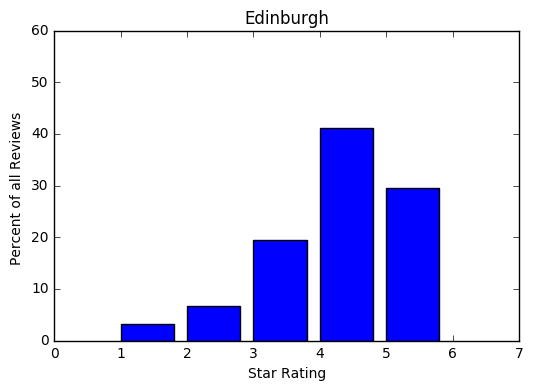

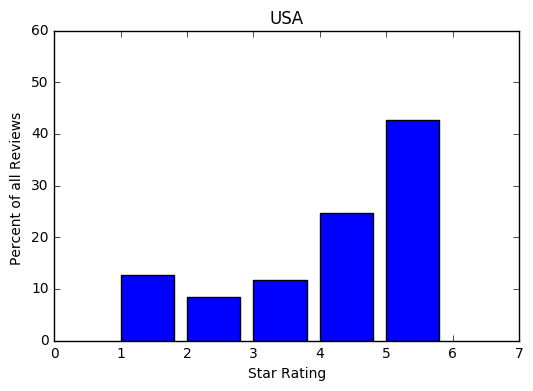

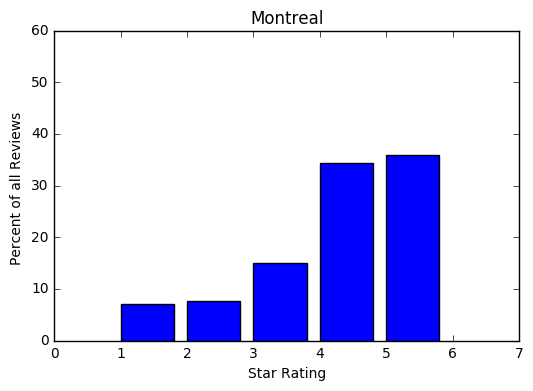

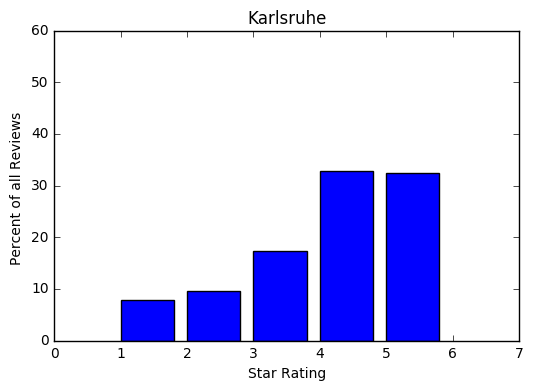

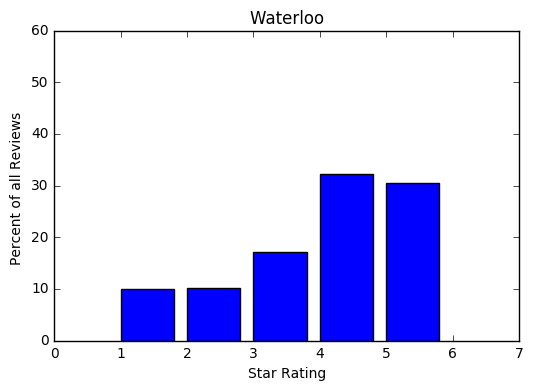

In [85]:
for place, counter in reviews.items():
    total_stars = float(sum(counter.values()))
    proportions = {k:v/total_stars for (k,v) in counter.items()}
    pyplot.bar(counter.keys(), [x*100 for x in proportions.values()])
    pyplot.xlabel("Star Rating")
    pyplot.axis([0,7,0,60])
    pyplot.ylabel("Percent of all Reviews ")
    pyplot.title(place)
    pyplot.show()

Extract these images, add some observations...

In [ ]:
reviews_df['text'] = reviews_df['text']

In [88]:
us_reviews = reviews_df[reviews_df['location']=='USA']

In [ ]:
date_words = ['date', 'dating', 'boyfriend', 'girlfriend', 'bf', 'gf', 'partner', 
              'marry', 'marriage', 'wedding', 'honeymoon', 'honey moon', 'anniversary']
# omitting low-signal words like SO, proposed, etc.
